## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = x[3601]
some_digit_image = some_digit.reshape(28, 28) # lets reshape it to plot it

(-0.5, 27.5, 27.5, -0.5)

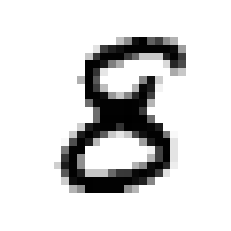

In [9]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [10]:
y[3601]

'8'

In [11]:
x_train, x_test = x[0:6000], x[6000:7000]

In [12]:
y_train, y_test = y[0:6000], y[6000:7000]

In [13]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 detector

In [14]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [15]:
y_train

array([1, 2, 2, ..., 3, 3, 1], dtype=int8)

In [16]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression(tol = 0.1, solver='lbfgs')

In [25]:
clf.fit(x_train, y_train_2)

c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [26]:
clf.predict([some_digit])

array([False])

In [21]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\haris\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
a.mean()

0.9731671620834571

## Quiz

In [ ]:
Create a classifier which will classify a digit always as "not 2"
90% --> not 2